In [6]:
#imports
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import pathlib
import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
#Paths
absolute_path_imperfect = os.path.join(os.path.abspath(''),"Imperfect_structure_Data")
absolute_path_perfect = os.path.join(os.path.abspath(''),"Perfect_Structure_data")
#We can change the case to test with deformation, stress etc
case = "Shear Stress YZ.csv"

In [8]:
def generate_data_imperfect(imperfect, perfect, case):
    """
    Generate data for training a neural network with the imperfect simulations.

    Parameters:
    imperfect (str): The path of the imperfect data file.
    perfect (str): The path of the corresponding perfect data file.
    case (str): The path of the case.

    Returns:
    numpy.ndarray: An array containing the data for training the neural network.
    """

    # Get the path
    path_imperfect = os.path.join(absolute_path_imperfect,imperfect)
    path_perfect = os.path.join(absolute_path_perfect,perfect)
    final_path_imperfect = os.path.join(path_imperfect, case)
    final_path_perfect = os.path.join(path_perfect, case)

    df_imperfect = pd.read_csv(final_path_imperfect)
    df_perfect = pd.read_csv(final_path_perfect)

    # We use the node number as the index
    df_perfect.set_index(df_perfect["Node Number"], inplace=True)
    df_imperfect.set_index(df_imperfect["Node Number"], inplace=True)
    # We drop the columns that we don't need
    df_perfect.drop(columns=[ "Unnamed: 12", "Node Number"], inplace=True)
    df_imperfect.drop(columns=[ "Unnamed: 12", "Node Number"], inplace=True)

    # We label the nodes that aren't missing with 0
    df_perfect["Label"] = 0
    df_imperfect["Label"] = 0

    # We get the missing rows of the imperfect data
    missing_rows = pd.DataFrame(df_perfect[~df_perfect.index.isin(df_imperfect.index)])
    for column in missing_rows.columns:
        missing_rows[column] = 10000 ### arbitrary value, which will be masked afterwards
    missing_rows["Label"] = 1
    # We add the missing rows to the imperfect data and sort them according to the node number
    df_imperfect_final = pd.concat([df_imperfect,missing_rows])
    df_imperfect_final_sorted = df_imperfect_final.sort_index()
    
    data = []
    # We choose the relevant columns
    for column in df_imperfect_final_sorted.columns[1:-2]:
        data.append(np.array(df_imperfect_final_sorted[column].values))
    data.append(np.array(df_imperfect_final_sorted["Label"].values))
    return np.array(data)

In [9]:
test = generate_data_imperfect("Imperfect_no_1_1_train_extreme_track_2000N", "Perfect_structure_1_train_extreme_track_2000N", case)
test

array([[ 0.18969  ,  0.078474 ,  0.19178  , ..., -0.0036429,  0.018487 ,
        -0.17476  ],
       [ 0.37608  ,  0.15303  ,  0.38064  , ..., -0.007453 ,  0.03727  ,
        -0.35352  ],
       [ 0.18974  ,  0.078471 ,  0.19182  , ..., -0.003645 ,  0.018487 ,
        -0.1748   ],
       ...,
       [ 2.0353   ,  0.33079  ,  1.0681   , ...,  0.0093193, -0.19251  ,
         0.7734   ],
       [ 1.0337   ,  0.17165  ,  0.55494  , ...,  0.0097816, -0.092647 ,
         0.39221  ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

In [10]:

"""
Here we generate the data for the perfect simulations.

"""
def generate_data_perfect(perfect, case):
    path_perfect = os.path.join(absolute_path_perfect,perfect)
    final_path_perfect = os.path.join(path_perfect, case)

    df_perfect = pd.read_csv(final_path_perfect)

    df_perfect.set_index(df_perfect["Node Number"], inplace=True)

    df_perfect.drop(columns=[ "Unnamed: 12", "Node Number"], inplace=True)

    df_perfect["Label"] = 0

    data = []
    
    for column in df_perfect.columns[1:-2]:
        data.append(np.array(df_perfect[column].values))
    data.append(np.array(df_perfect["Label"].values))
    return np.array(data)
 

In [11]:
imperfect_paths = ["Imperfect_no_1_1_train_extreme_track_2000N", "Imperfect_no_1_1_train_extreme_track_5000N",
                   "Imperfect_no_1_2_trains_opposite_direction_extreme_track_2000N", "imperfect_no_2_1_train_extreme_Track_5000N",
                    "Imperfect_no_2_2_trains_opposite_direction_Extreme_tracks_2000N", "Imperfect_no_3_1_train_extreme_track_2000N",
                    "imperfect_no_3_1_train_extreme_track_5000N", "Imperfect_no_3_2_trains_opposite_direction_extreme_tracks_2000N",
                    "imperfect_no_4_1_train_extreme_track_2000N", "imperfect_no_4_1_train_extreme_track_5000N",
                    "Imperfect_no_4_2_trains_opposite_direction_extreme_track_2000N", "imperfect_no_5_1_train_extreme_track_2000N",
                    "imperfect_no_5_1_train_extreme_track_5000N", "Imperfect_no_5_2_trains_opposite_direction_extreme_track_2000N"                   
                     ]

perfect_paths = ["Perfect_structure_1_train_extreme_track_2000N", "Perfect_structure_1_train_extreme_track_5000N",
                "Perfect_structure_2_trains_opposite_direction_extreme_tracks_2000N", "Perfect_structure_1_train_middle_track_2000N"]

In [12]:
data_imperfect = np.vstack([[generate_data_imperfect("Imperfect_no_1_1_train_extreme_track_2000N", "Perfect_structure_1_train_extreme_track_2000N", case)],
                    [generate_data_imperfect("Imperfect_no_1_1_train_extreme_track_5000N", "Perfect_structure_1_train_extreme_track_5000N", case)],
                    [generate_data_imperfect("Imperfect_no_1_2_trains_opposite_direction_extreme_track_2000N", "Perfect_structure_2_trains_opposite_direction_extreme_tracks_2000N" , case)],
                    [generate_data_imperfect("imperfect_no_2_1_train_extreme_Track_5000N","Perfect_structure_1_train_extreme_track_5000N", case)],
                    [generate_data_imperfect("Imperfect_no_2_2_trains_opposite_direction_Extreme_tracks_2000N","Perfect_structure_2_trains_opposite_direction_extreme_tracks_2000N", case)],
                    [generate_data_imperfect("Imperfect_no_3_1_train_extreme_track_2000N","Perfect_structure_1_train_extreme_track_2000N" , case)],
                    [generate_data_imperfect("imperfect_no_3_1_train_extreme_track_5000N","Perfect_structure_1_train_extreme_track_5000N", case)],
                    [generate_data_imperfect("Imperfect_no_3_2_trains_opposite_direction_extreme_tracks_2000N","Perfect_structure_2_trains_opposite_direction_extreme_tracks_2000N", case)],
                    [generate_data_imperfect("imperfect_no_4_1_train_extreme_track_2000N","Perfect_structure_1_train_extreme_track_2000N", case)],
                    [generate_data_imperfect("imperfect_no_4_1_train_extreme_track_5000N","Perfect_structure_1_train_extreme_track_5000N", case)],
                    [generate_data_imperfect("Imperfect_no_4_2_trains_opposite_direction_extreme_tracks_2000N","Perfect_structure_2_trains_opposite_direction_extreme_tracks_2000N", case)],
                    [generate_data_imperfect("imperfect_no_5_1_train_extreme_track_2000N","Perfect_structure_1_train_extreme_track_2000N", case)],
                    [generate_data_imperfect("imperfect_no_5_1_train_extreme_track_5000N","Perfect_structure_1_train_extreme_track_5000N", case)],
                    [generate_data_imperfect("Imperfect_no_5_2_trains_opposite_direction_extreme_tracks_2000N","Perfect_structure_2_trains_opposite_direction_extreme_tracks_2000N", case)]])
                    


In [13]:
data_imperfect.shape


(14, 10, 29226)

In [14]:
data_perfect = np.vstack([[generate_data_perfect(perfect_paths[i], case) for i in range(len(perfect_paths))]])
data_perfect.shape

(4, 10, 29226)

In [15]:
# We create the final data array
data_final = np.vstack([data_imperfect, data_perfect])
data_final.shape


(18, 10, 29226)

In [16]:
# We shuffle the data
data_final = np.random.permutation(data_final)

In [17]:
data_final.shape

(18, 10, 29226)

In [18]:
# We separate the data into values and labels
values = []
labels = []
for element in data_final:
    values.append(element[0:-1])
    labels.append(element[-1])

In [19]:
values = np.array(values)
labels = np.array(labels)

In [17]:
values.shape

(18, 9, 29226)

In [18]:
labels.shape

(18, 29226)

In [19]:
# Define the model
model = tf.keras.models.Sequential()

# Add a masking layer
model.add(tf.keras.layers.Masking(mask_value=10000, input_shape=(values.shape[1], values.shape[2])))
# Add an LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))

# Add a Dense output layer with sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(units=29226, activation='sigmoid'))

In [20]:
# For classification we use binary crossentropy as loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=tf.keras.metrics.BinaryAccuracy())
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 9, 29226)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               15029760  
                                                                 
 dense (Dense)               (None, 29226)             3770154   
                                                                 
Total params: 18799914 (71.72 MB)
Trainable params: 18799914 (71.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# We train the neural network
model.fit(values, labels, epochs=400, validation_split=0.2, batch_size=10, callbacks=[early_stopping])

Epoch 1/400
2/2 [==============================] - 3s 785ms/step - loss: 111.0772 - binary_accuracy: 0.5057 - val_loss: 73.3011 - val_binary_accuracy: 0.5508
Epoch 2/400
2/2 [==============================] - 1s 366ms/step - loss: 90.9940 - binary_accuracy: 0.5522 - val_loss: 57.2100 - val_binary_accuracy: 0.6092
Epoch 3/400
2/2 [==============================] - 1s 371ms/step - loss: 45.4445 - binary_accuracy: 0.6113 - val_loss: 56.3594 - val_binary_accuracy: 0.6606
Epoch 4/400
2/2 [==============================] - 1s 385ms/step - loss: 48.8054 - binary_accuracy: 0.6476 - val_loss: 51.0730 - val_binary_accuracy: 0.7376
Epoch 5/400
2/2 [==============================] - 1s 394ms/step - loss: 32.7559 - binary_accuracy: 0.7137 - val_loss: 32.5008 - val_binary_accuracy: 0.7775
Epoch 6/400
2/2 [==============================] - 1s 403ms/step - loss: 28.3973 - binary_accuracy: 0.7514 - val_loss: 26.3404 - val_binary_accuracy: 0.7998
Epoch 7/400
2/2 [==============================] - 1s 378

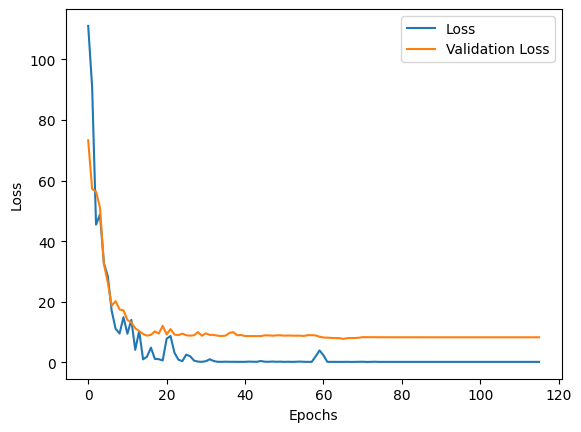

In [24]:
# Plot the loss and validation loss
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
model.save("LSTM_ShearYZ.h5")


c:\Users\marce\miniconda3\envs\Masterarbeit\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
model_path = os.path.join(os.path.abspath(''),"LSTM_ShearYZ.h5")
model = tf.keras.models.load_model(model_path)

In [21]:
prediction = model.predict(values)

1/1 [==============================] - 0s 427ms/step


In [22]:
print(prediction[0])

[9.1640855e-11 1.1173075e-19 2.0970854e-20 ... 3.0067968e-16 3.3388023e-15
 1.7571161e-17]


In [37]:
print(labels[0].shape)
print(prediction[0].shape)

(29226,)
(29226,)


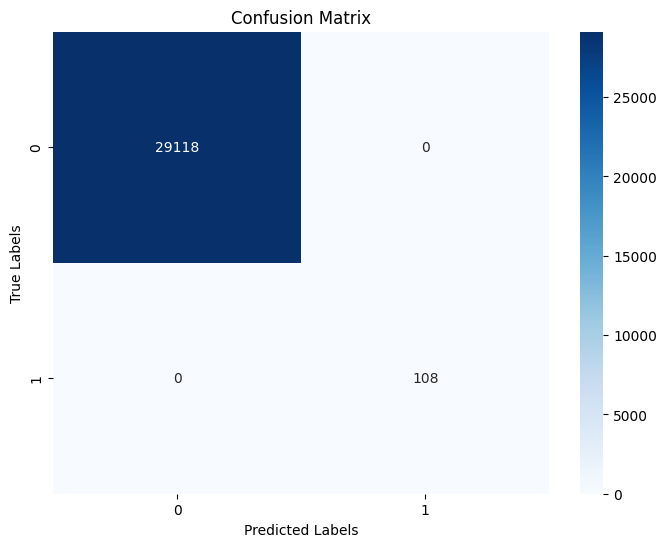

[[29118     0]
 [    0   108]]


In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert the predictions to binary values
results = []
for element in prediction[5]:
        if element >= 0.5:
            results.append(1) 
        else:
            results.append(0)

# Create the confusion matrix
cm = confusion_matrix(labels[5], results)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Print the confusion matrix
print(cm)


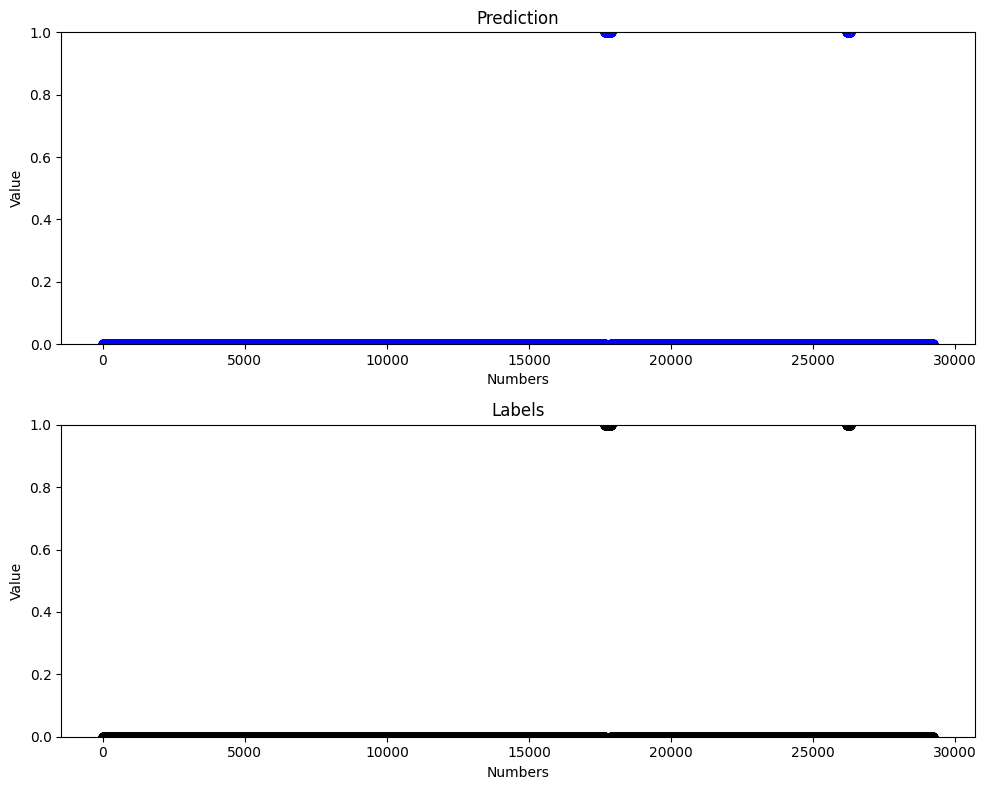

In [29]:
numbers = list(i for i in range(29226))
j = 4
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.scatter(numbers, prediction[j], color="blue",)
ax1.set_title("Prediction")
ax1.set_xlabel("Numbers")
ax1.set_ylabel("Value")
ax1.set_ylim(0, 1)  # Set the y-axis limits to 0 and 1

ax2.scatter(numbers, labels[j], color="black")
ax2.set_title("Labels")
ax2.set_xlabel("Numbers")
ax2.set_ylabel("Value")
ax2.set_ylim(0, 1)  # Set the y-axis limits to 0 and 1

plt.tight_layout()
plt.show()


In [42]:
test_data = generate_data_imperfect("Imperfect_no_4_1_train_middle_track_2000N_test_set","Perfect_structure_1_train_middle_track_2000N",case)

In [43]:
test_data.shape

(10, 29226)

In [44]:
values_test = test_data[0:-1]
labels_test = test_data[-1]


values_test = np.array(values_test)
labels_test = np.array(labels_test)

In [45]:
values_test.shape

(9, 29226)

In [46]:
values_test = np.reshape(values_test, (1, values_test.shape[0], values_test.shape[1]))

In [47]:
values_test.shape

(1, 9, 29226)

In [48]:
prediction_test = model.predict([values_test])

1/1 [==============================] - 0s 266ms/step


In [51]:
prediction_test

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

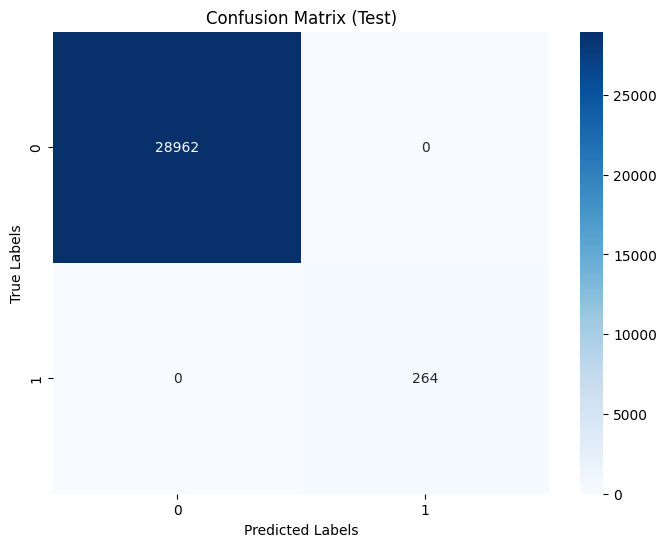

[[28962     0]
 [    0   264]]


In [52]:
# Convert the predictions to binary values
results_test = []
for element in prediction_test[0]:
    if element >= 0.5:
        results_test.append(1) 
    else:
        results_test.append(0)

# Create the confusion matrix
cm_test = confusion_matrix(labels_test, results_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print(cm_test)
